In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
trainData = pd.read_csv('train.csv')
testData= pd.read_csv('test.csv')


In [3]:
print(trainData.head(10))
print(trainData.shape)

   patient_id                        name_of_drug  \
0      206461                           Valsartan   
1       95260                          Guanfacine   
2       92703                              Lybrel   
3       35696            Buprenorphine / naloxone   
4      155963                              Cialis   
5       48928  Ethinyl estradiol / levonorgestrel   
6       75612                      L-methylfolate   
7      219869                       Amitriptyline   
8      212077                         Lamotrigine   
9       12372                             Atripla   

              use_case_for_drug  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3             Opiate Dependence   
4  Benign Prostatic Hyperplasia   
5                 Birth Control   
6                    Depression   
7                   ibromyalgia   
8               Bipolar Disorde   
9                 HIV Infection   

                              

In [4]:
print(testData.head(10))
print(testData.shape)

   patient_id       name_of_drug  \
0      163740        Mirtazapine   
1       39293           Contrave   
2      208087            Zyclara   
3       23295          Methadone   
4       97013             Ambien   
5      213376            Nuvigil   
6       79865  Blisovi Fe 1 / 20   
7       27607         Ivermectin   
8       60341           NuvaRing   
9      141462       Escitalopram   

                                   review_by_patient drug_approved_by_UIC  \
0  "I&#039;ve tried a few antidepressants over th...            28-Feb-12   
1  "Contrave combines drugs that were used for al...             5-Mar-17   
2  "4 days in on first 2 weeks.  Using on arms an...             3-Jul-14   
3  "Ive been on Methadone for over ten years and ...            18-Oct-16   
4  "Ditto on rebound sleepless when discontinued....            13-Jan-15   
5  "A doctor in the ER prescribed me 200 mg of Pr...            30-Jun-10   
6  "I absolutely love this product and recommend ...            

In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [6]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10760 entries, 0 to 10759
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   patient_id                  10760 non-null  int64 
 1   name_of_drug                10760 non-null  object
 2   review_by_patient           10760 non-null  object
 3   drug_approved_by_UIC        10760 non-null  object
 4   number_of_times_prescribed  10760 non-null  int64 
 5   use_case_for_drug           10760 non-null  object
 6   effectiveness_rating        10760 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 588.6+ KB


In [7]:
trainData.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


In [8]:
testData.describe()

,patient_id,number_of_times_prescribed,effectiveness_rating
count,10760.000000,10760.000000,10760.000000
mean,116515.126487,27.596004,6.963755
std,66889.245383,34.050059,3.275637
min,21.000000,0.000000,1.000000
25%,58079.000000,6.000000,4.000000
50%,116756.500000,16.000000,8.000000
75%,174256.500000,35.000000,10.000000
max,232253.000000,484.000000,10.000000


In [9]:
trainData.isnull().sum()


patient_id                    0
name_of_drug                  0
use_case_for_drug             0
review_by_patient             0
effectiveness_rating          0
drug_approved_by_UIC          0
number_of_times_prescribed    0
base_score                    0
dtype: int64

In [10]:
testData.isnull().sum()

patient_id                    0
name_of_drug                  0
review_by_patient             0
drug_approved_by_UIC          0
number_of_times_prescribed    0
use_case_for_drug             0
effectiveness_rating          0
dtype: int64

C:\Users\admin1\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='base_score', ylabel='Density'>

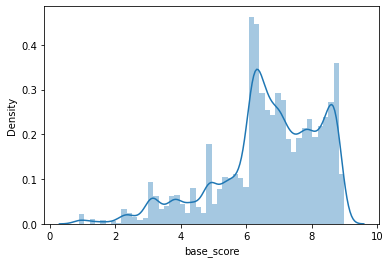

In [11]:
sns.distplot(trainData['base_score'])

<AxesSubplot:>

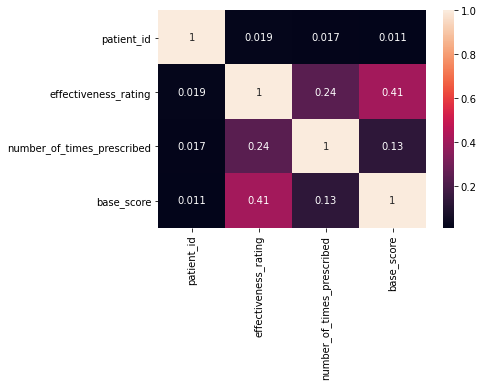

In [12]:
sns.heatmap(trainData.corr(),annot = True)

C:\Users\admin1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='name_of_drug', ylabel='number_of_times_prescribed'>

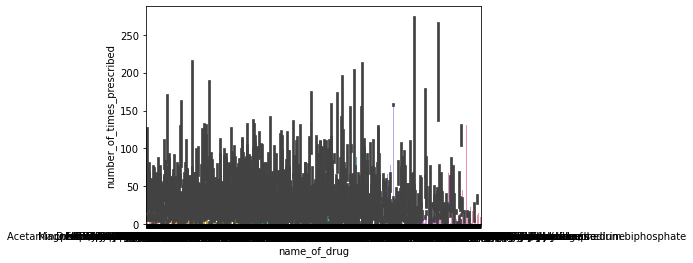

In [13]:
sns.barplot(trainData['name_of_drug'],trainData['number_of_times_prescribed'])

In [14]:
trainData.columns 

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score'],
      dtype='object')

In [15]:
testData.columns

Index(['patient_id', 'name_of_drug', 'review_by_patient',
       'drug_approved_by_UIC', 'number_of_times_prescribed',
       'use_case_for_drug', 'effectiveness_rating'],
      dtype='object')

In [16]:
trainData.count()

patient_id                    32165
name_of_drug                  32165
use_case_for_drug             32165
review_by_patient             32165
effectiveness_rating          32165
drug_approved_by_UIC          32165
number_of_times_prescribed    32165
base_score                    32165
dtype: int64

In [17]:
testData.count()

patient_id                    10760
name_of_drug                  10760
review_by_patient             10760
drug_approved_by_UIC          10760
number_of_times_prescribed    10760
use_case_for_drug             10760
effectiveness_rating          10760
dtype: int64

In [18]:
x_train = trainData[['name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed']]
x_train

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
...,...,...,...,...,...,...
32160,Cymbalta,Anxiety,"""I have been taking Cymbalta for 15 months now...",9,10-Jun-13,89
32161,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,6-Apr-17,0
32162,Venlafaxine,Panic Disorde,"""Had panic attacks and social anxiety starting...",9,10-Nov-16,25
32163,Fluoxetine,Obsessive Compulsive Disorde,"""I have been off Prozac for about 4 weeks now....",8,21-Jan-15,22


In [19]:
y_train=trainData[["base_score"]]

In [20]:
x_test=testData[['name_of_drug', 'review_by_patient',
       'drug_approved_by_UIC', 'number_of_times_prescribed',
       'use_case_for_drug', 'effectiveness_rating']]
x_test

,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2
...,...,...,...,...,...,...
10755,Chantix,"""I took chantix a little over a month. It made...",11-Nov-17,2,Smoking Cessation,1
10756,Armodafinil,"""This medicine kept me from sleeping the whole...",30-Sep-14,18,Narcolepsy,1
10757,Tamoxifen,"""I have taken Tamoxifen for 5 years. Side effe...",13-Sep-14,43,"Breast Cancer, Prevention",10
10758,Levonorgestrel,"""I&#039;m married, 34 years old and I have no ...",15-Nov-10,7,Birth Control,8


In [21]:
#For Encoding the text column values in train and test data set to numeric value 
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [22]:
#Encoding 
x_train_encoded = x_train.apply(lbe.fit_transform)
x_test_encoded = x_test.apply(lbe.fit_transform)
x_train_encoded.head()

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed
0,2072,335,21000,8,1474,27
1,923,39,23254,7,2213,192
2,1212,110,15592,4,606,17
3,332,412,25354,8,2305,37
4,436,105,182,1,2420,43


In [23]:
x_test_encoded.head()

,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,854,7164,2058,22,130,9
1,311,813,2640,35,441,8
2,1471,81,2274,13,241,3
3,821,7562,998,21,299,6
4,66,909,442,44,231,1


<AxesSubplot:>

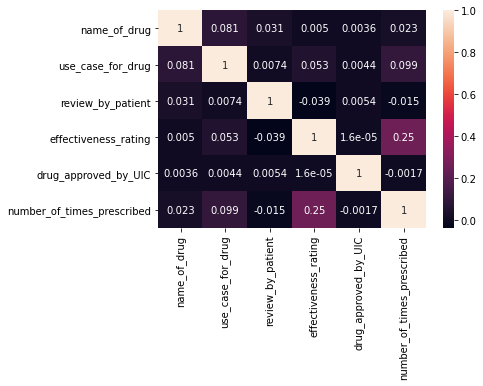

In [24]:
sns.heatmap(x_train_encoded.corr(),annot = True)

Building Model

In [25]:
#Importing the prediction model from scikit library 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [26]:
#initialize the models
m1 = LinearRegression()
m2=RandomForestRegressor(max_features='sqrt')
m3 = DecisionTreeRegressor()
m4 = MLPRegressor()

Calculate the Model Score by Splitting Train Data into train and test split

In [27]:
#train Test split
from sklearn.model_selection import train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train_encoded, y_train, test_size=0.2, random_state=101)

In [28]:
#Fitting the data - training the model- LR
m1.fit(x_train1,y_train1)
y_pred1=m1.predict(x_test1)
print('Model score: %.2f' % m1.score(x_test1, y_test1))

Model score: 0.18


In [29]:
#Fitting the data - training the model- RF
m2.fit(x_train1,y_train1)
y_pred2=m2.predict(x_test1)
print('Model score: %.2f' % m2.score(x_test1, y_test1))

<ipython-input-29-7d5ef1af53d3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m2.fit(x_train1,y_train1)


Model score: 0.79


In [30]:
#Fitting the data and finding model Score for train_test_split - training the model- DT
m3.fit(x_train1,y_train1)
y_pred3=m3.predict(x_test1)
print('Model score: %.2f' % m3.score(x_test1, y_test1))

Model score: 0.96


In [31]:
#Fitting the data - training the model- MLPReg
m4.fit(x_train1,y_train1)
y_pred3=m4.predict(x_test1)
print('Model score: %.2f' % m4.score(x_test1, y_test1))

C:\Users\admin1\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model score: -43.99


DT is performing well = 0.96.
Now fit the entire Train Dataset to each model and make predictions.

In [32]:
#Fitting the data - training the model- LR
m1.fit(x_train_encoded,y_train)

LinearRegression()

In [ ]:
#Fitting the data - training the model- RF
m2.fit(x_train_encoded,y_train)

<ipython-input-33-da4ccf99dcd5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m2.fit(x_train_encoded,y_train)


In [ ]:
#Fitting the data - training the model- DTR
m3.fit(x_train_encoded,y_train)

In [ ]:
#Fitting the data - training the model- MLPReg
m4.fit(x_train_encoded,y_train)

In [ ]:
#make predicton on the test set - LR Predictions
pred1 = m1.predict(x_test_encoded)
pred1.round(6)

In [ ]:
#RF Predictions
pred2 = m2.predict(x_test_encoded)
pred2.round(6)

In [ ]:
#DT Predictions
pred3 = m3.predict(x_test_encoded)
pred3.round(6)

In [ ]:
#MLP Reg Predictions
pred4 = m4.predict(x_test_encoded)
pred4.round(6)

In [ ]:
#Saving the predictions in csv file , by taking DT predictions
submission = pd.DataFrame()
submission['patient_id'] = testData['patient_id']
pred3=pred3.round(6)
submission['base_score'] = pred3[0] # our model predictions on the test dataset
#submission.head()
submission.to_csv('results_DT.csv', index=False)
print('Saved the submission file')

In [ ]:
test_result = pd.read_csv('results_DT.csv')
test_result